## Classification Adult Income  using KNN and Logistic Regression
## By Fauzan Taufik

In [1]:
import numpy as np
import pandas as pd
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df_train=pd.read_csv('aduldatatrain.csv', header=None, names=['Age', 'Workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation','relationship', 'race','sex','capital-gain','capita-loss',
                                                             'hours-per-week','native-country', 'class_Income'])
df_test=pd.read_csv('aduldatatest.csv', header=None, names=['Age', 'Workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation','relationship', 'race','sex','capital-gain','capita-loss',
                                                             'hours-per-week','native-country', 'class_Income'])

In [3]:
df_train.head()

,Age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capita-loss,hours-per-week,native-country,class_Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
print(df_train.info())
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31880 entries, 0 to 31879
Data columns (total 15 columns):
Age               31880 non-null int64
Workclass         31880 non-null object
fnlwgt            31880 non-null int64
education         31880 non-null object
education-num     31880 non-null int64
marital-status    31880 non-null object
occupation        31880 non-null object
relationship      31880 non-null object
race              31880 non-null object
sex               31879 non-null object
capital-gain      31879 non-null float64
capita-loss       31879 non-null float64
hours-per-week    31879 non-null float64
native-country    31879 non-null object
class_Income      31879 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 3.6+ MB
None
                Age        fnlwgt  education-num  capital-gain   capita-loss  \
count  31880.000000  3.188000e+04   31880.000000  31879.000000  31879.000000   
mean      38.561731  1.899429e+05      10.080583   1077.526240  

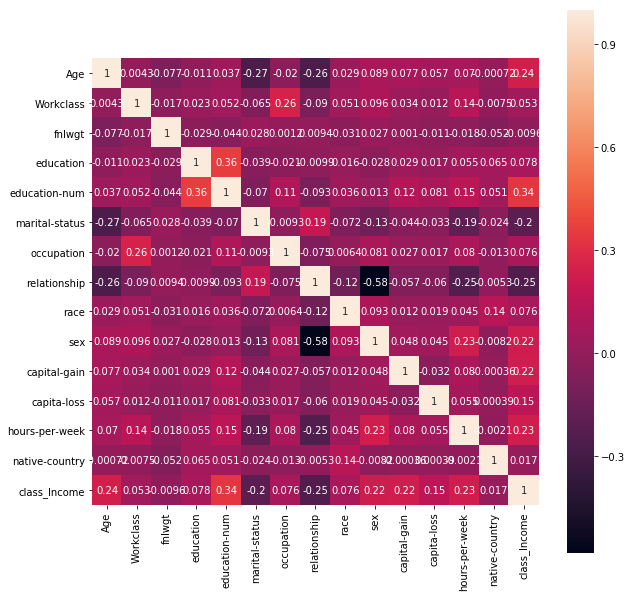

       Age  Workclass  fnlwgt  education  education-num  marital-status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
5       37          4  284582         12             14               2   
6       49          4  160187          6              5               3   
7       52          6  209642         11              9               2   
8       31          4   45781         12             14               4   
9       42          4  159449          9             13               2   
10      37          4  280464         15             10               2   
11      30          7  141297          9             13               2   
12      23          4  12

In [5]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column].astype(str))
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(df_train)
plt.figure(figsize=(10,10))
sns.heatmap(encoded_data.corr(), square=True, annot=True)
plt.show()

print(encoded_data)

       sex    relationship
0     Male   Not-in-family
1     Male         Husband
2     Male   Not-in-family
3     Male         Husband
4   Female            Wife


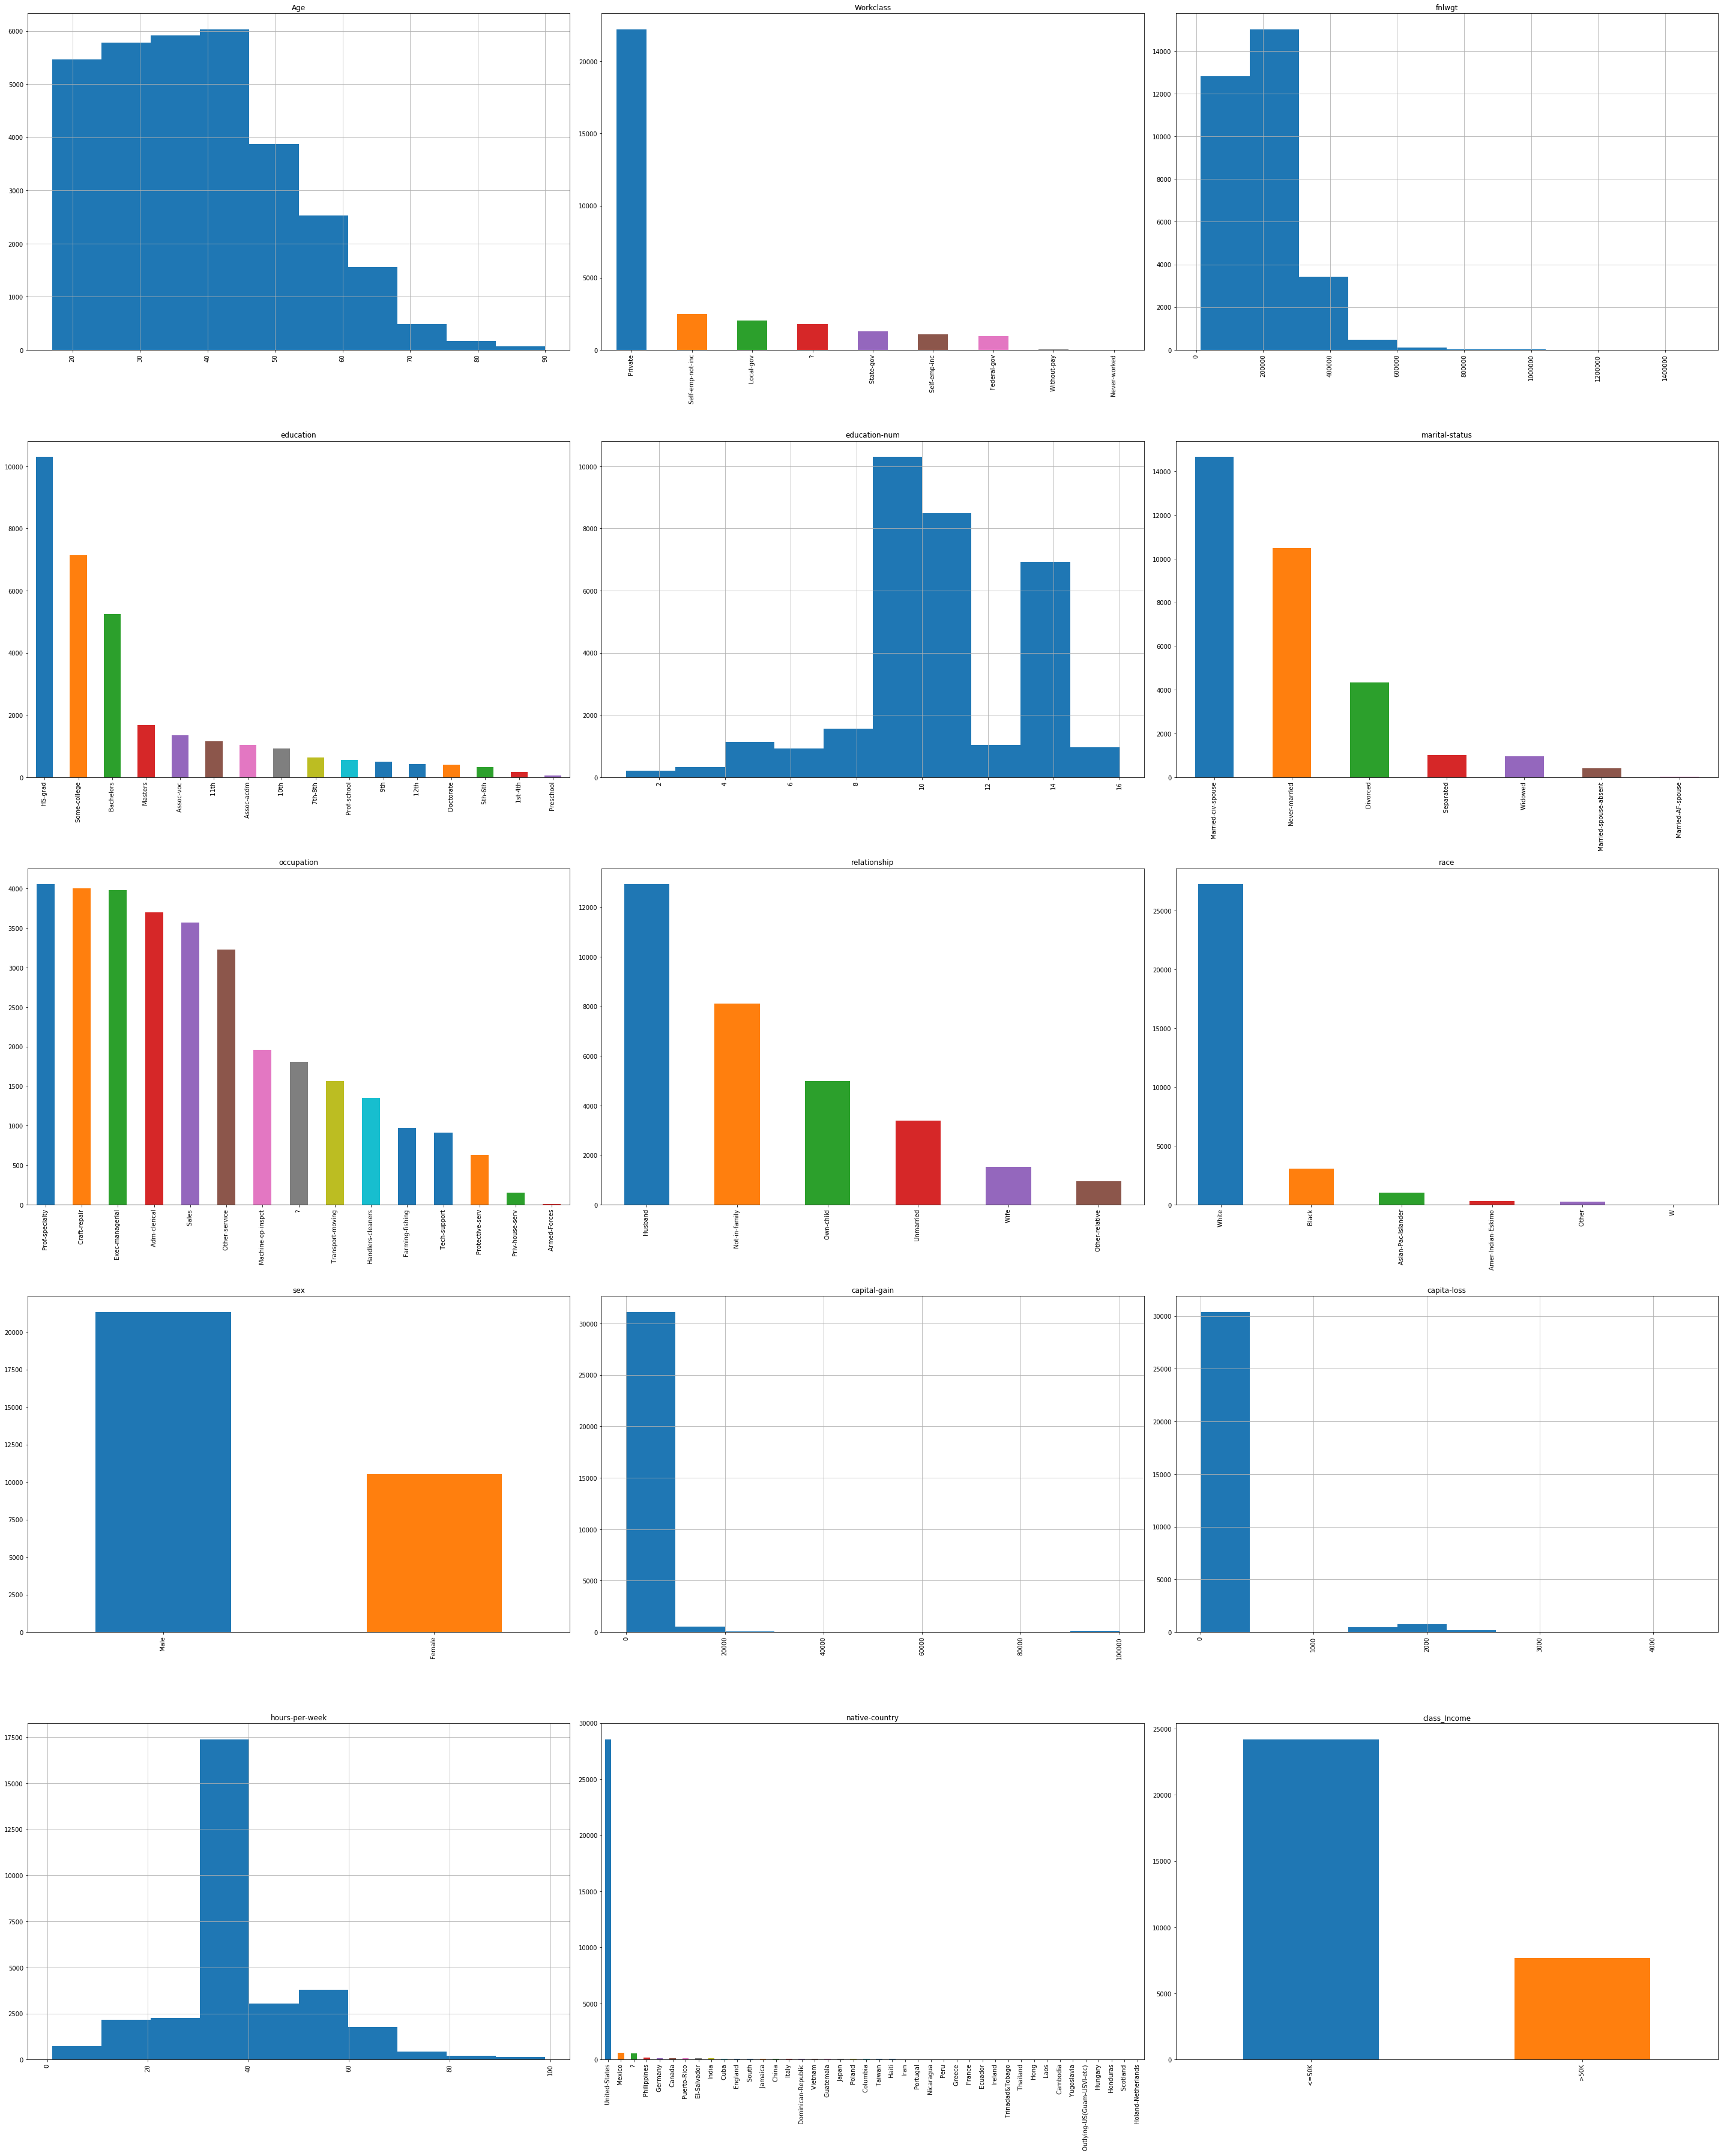

In [6]:
print(df_train[['sex', 'relationship']].head(5))
##it's absolutly have strong correlation since male mostly a husband and female a wife, but we don't know how to tackle this problem,
##so let's carry ON
fig = plt.figure(figsize=(40,50))
i=1

for col in df_train.columns :
    ax = fig.add_subplot(5,3,i)
    ax.set_title(col)
    if df_train.dtypes[col]==np.object:
        df_train[col].value_counts().plot(kind='bar', axes=ax)
    else:
        df_train[col].hist(axes=ax)
        plt.xticks(rotation="vertical")
    i=i+1
        
plt.tight_layout()
plt.show()

## Preprocessing Data

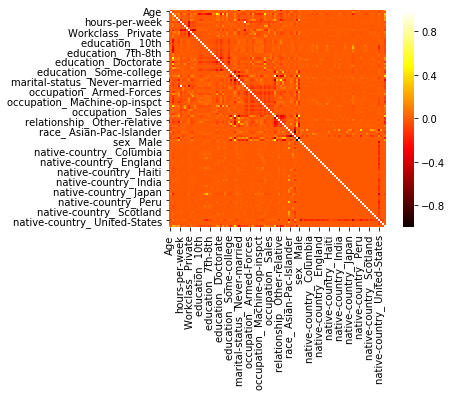

In [7]:
from sklearn.preprocessing import Imputer
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

df_train=df_train.dropna()
binary_data=pd.get_dummies(df_train)
binary_data['Target']=binary_data['class_Income_ >50K']
del binary_data['class_Income_ <=50K']
del binary_data['class_Income_ >50K']
sns.heatmap(binary_data.corr(), square=True, cmap='hot', color='white')
plt.show()

## KNN MODEL

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler.fit_transform(binary_data)
knn = KNeighborsClassifier()
param_model2 = {'n_neighbors': np.arange(10,14)}

X = binary_data.drop(['Target'], axis=1)
Y = binary_data['Target']
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3)

gs_cv=GridSearchCV(knn, param_model2, cv=3)
gs_cv.fit(X_train, Y_train)

print(gs_cv.best_params_)

print(gs_cv.best_score_)

{'n_neighbors': 12}
0.7963701546045261


In [17]:
Y.shape

(31879,)

             precision    recall  f1-score   support

          0       0.80      0.98      0.88      7286
          1       0.77      0.22      0.34      2278

avg / total       0.79      0.80      0.75      9564



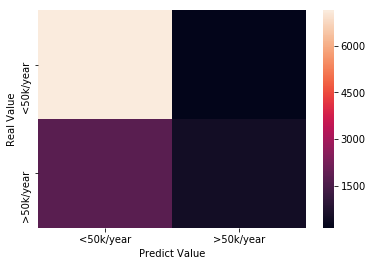

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred=gs_cv.predict(x_test)
cmknn = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cmknn, fmt='d', xticklabels=['<50k/year', '>50k/year'], yticklabels=['<50k/year', '>50k/year'])
plt.ylabel("Real Value")
plt.xlabel("Predict Value")
plt.show()

In [21]:
cmknn

array([[7134,  152],
       [1778,  500]], dtype=int64)

## Logistic Regression

In [10]:
logres = LogisticRegression()
params= {'C' : np.logspace(-8,7,11)}
gls_cv=GridSearchCV(logres, params, cv=4)

gls_cv.fit(X_train, Y_train)

print(gls_cv.best_params_)
print(gls_cv.best_score_)

{'C': 1e-05}
0.7965942191351109


In [15]:
Y_train

9205     1
23417    1
107      0
27726    0
30863    0
585      0
16522    0
6286     0
3446     0
23932    1
17688    0
29882    0
2548     0
29036    0
1303     0
9231     0
27968    0
31555    0
18228    0
22397    0
16961    1
3814     0
22597    0
26065    1
8638     0
11161    0
20419    0
15092    0
22008    1
2461     0
        ..
23484    0
9361     0
9123     1
18705    0
2045     0
24462    0
18701    0
25478    0
13772    0
3998     0
27204    0
7749     0
18396    0
14013    0
10561    0
17701    1
27041    1
17648    1
23661    1
29842    0
19524    0
8695     0
5233     0
27348    0
17954    0
13504    0
15645    0
22919    1
20183    0
4195     0
Name: Target, Length: 22315, dtype: uint8

In [11]:
logres_model = LogisticRegression(C=316227.7660168379)
logres_model.fit(X_train, Y_train)
score = logres_model.score(x_test, y_test)

coefs=pd.Series(logres_model.coef_[0], index=X_train.columns)
coefs =coefs.sort_values(ascending=False)
five_most_positive = coefs[:5]
five_most_negative = coefs[-5:]
print(five_most_positive)
print(five_most_negative)

marital-status_ Married-civ-spouse    0.002872
relationship_ Husband                 0.002573
occupation_ Exec-managerial           0.000869
education_ Bachelors                  0.000791
capita-loss                           0.000790
dtype: float64
education-num                   -0.001857
sex_ Female                     -0.002130
marital-status_ Never-married   -0.002915
Age                             -0.004855
hours-per-week                  -0.010136
dtype: float64


## SUMMARY
The most variable influence phositive are capita-loss, capital-gain, Married, Husband, and Managerial
The most variable influence negative are hours-per-week, age, education-num, never-married, Female

In [12]:
print(score)

0.7987243831033041


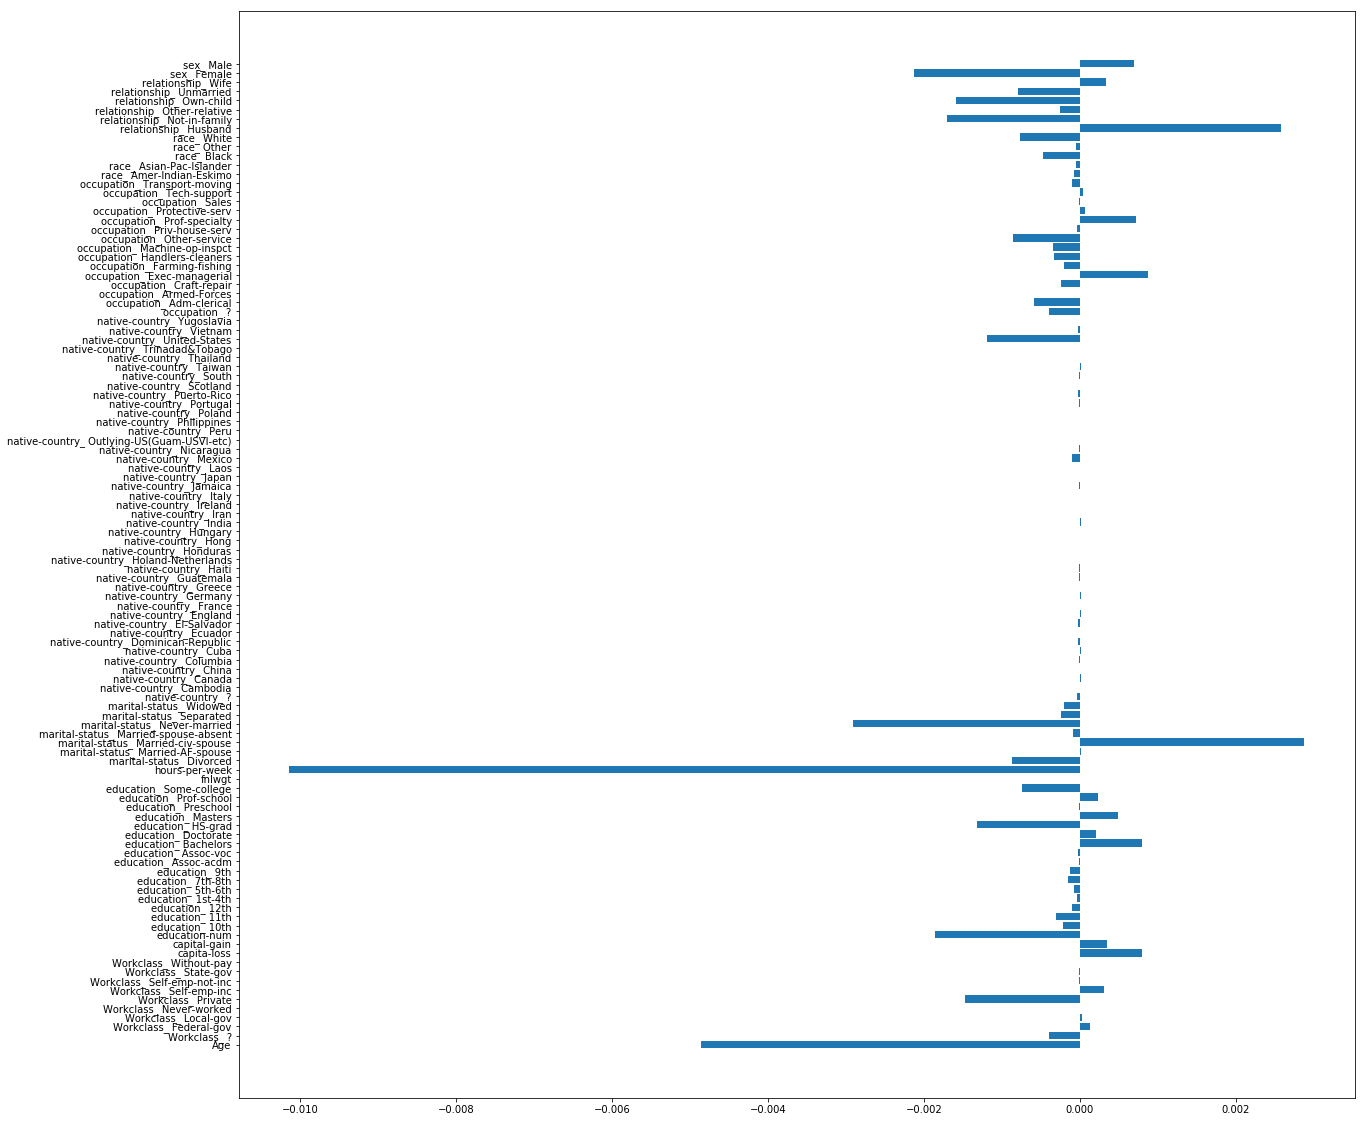

In [13]:
sorted(coefs)
plt.figure(figsize=(20,20))
plt.barh(coefs.index, coefs.values)
plt.show()

In [14]:
logres_model.get_params()

{'C': 316227.7660168379,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}